In [593]:
import sys
sys.path.append('../')  # Adjust the path accordingly
import warnings
warnings.filterwarnings("ignore")

from DataAnalysis.EventAnalyzer import EventAnalyzer
from PrepareDataset.DataEncoder.TabularEncoder import TabularEncoder
from PrepareDataset.DataEncoder.ComorbidityEncoder import ComorbidityEncoder
from PrepareDataset.DataEncoder.RadiomicsEncoder import RadiomicsEncoder
import pandas as pd
from PrepareDataset.DataEncoder.FeatureCollector import FeatureCollector

from PrepareDataset.DataEncoder.PreprocessLogger import PreprocessLogger

logger = PreprocessLogger(PreprocessLogger.__name__, jupyter=False, file_name="liver.log").logger
#logger.setLevel("ERROR")


In [594]:
## bca data
cohort_path = '/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/cancer_3m_3y/'
data_showcase_path = '/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/Data_Dictionary_Showcase.csv'

eids_path = cohort_path +'labels.csv'
eids_to_read = pd.read_csv(eids_path)['eid'].tolist()
#base_path = "/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/features/677795/"
cardiac_radiomics_path = "/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/cardiac_features/table_all.csv"


In [595]:
len(eids_to_read)

1202

In [596]:
feature_collector = FeatureCollector(label_path=(cohort_path + "labels_with_val.csv"), logger=logger)
file_path_to_features = cohort_path + "/preprocessed_features/"
#file_path_to_features = cohort_path + "/encoded_features/"
feature_collector.load_features(data_showcase_path=data_showcase_path, file_path_to_features=file_path_to_features)

2024-08-30 16:35:45,697 - PreprocessLogger - INFO - comorbidity_file_path, icd_code_dict_file_path and interested_date are not provided
2024-08-30 16:35:45,697 - PreprocessLogger - INFO - comorbidity_file_path, icd_code_dict_file_path and interested_date are not provided
2024-08-30 16:35:45,697 - PreprocessLogger - INFO - comorbidity_file_path, icd_code_dict_file_path and interested_date are not provided
2024-08-30 16:35:45,697 - PreprocessLogger - INFO - comorbidity_file_path, icd_code_dict_file_path and interested_date are not provided
2024-08-30 16:35:45,697 - PreprocessLogger - INFO - comorbidity_file_path, icd_code_dict_file_path and interested_date are not provided
2024-08-30 16:35:45,697 - PreprocessLogger - INFO - comorbidity_file_path, icd_code_dict_file_path and interested_date are not provided
2024-08-30 16:35:45,697 - PreprocessLogger - INFO - comorbidity_file_path, icd_code_dict_file_path and interested_date are not provided
2024-08-30 16:35:45,697 - PreprocessLogger - INF

In [597]:
#feature_collector_liver = feature_collector
#feature_collector_cvd = feature_collector
#feature_collector_cancer = feature_collector
#feature_collector_pancreas = feature_collector
#feature_collector_copd = feature_collector
feature_collector_ckd = feature_collector
#feature_collector_osteoarthritis = feature_collector

In [598]:
set_of_features= set([
#    "cardiac_radiomics",
#    "brain",
    "elixhauser_comorbidities", 
    "basic_features", 
    "bca_norm", 
#    "bca_norm2"
#    "sunexposure", 
    "met_physical_activity", 
#    "social_support", 
    "smoking", 
    "alcohol", 
#    "ageing", 
    "general_health", 
#    "employment", 
    "diet", 
#    "family_history",
    "clinical_biomarkers"
])

In [599]:
df_labels = pd.read_csv(cohort_path + "labels_with_val.csv")

In [600]:
df_labels['split'].value_counts()

split
train    864
test     241
val       97
Name: count, dtype: int64

In [601]:
#features_cancer = feature_collector_cancer.get_features(set_of_features)
#features_cvd = feature_collector_cvd.get_features(set_of_features)
#features_liver = feature_collector_liver.get_features(set_of_features)
#features_pancreas = feature_collector_pancreas.get_features(set_of_features)
#features_copd = feature_collector_copd.get_features(set_of_features)
features_ckd = feature_collector_ckd.get_features(set_of_features)
#features_osteoarthritis = feature_collector_osteoarthritis.get_features(set_of_features)


2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36:09,192 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-30 16:36

In [602]:
features_ckd["split"].value_counts()

split
train    961
test     241
Name: count, dtype: int64

In [603]:
# replace split column in features_ckd with df_labels split column merging by eid
features_ckd.drop(columns=["split"], inplace=True)
features_ckd = features_ckd.merge(df_labels[["eid", "split"]], on="eid", how="left")

In [604]:
features_ckd["split"].value_counts()

split
train    864
test     241
val       97
Name: count, dtype: int64

In [605]:
#ca_liver = EventAnalyzer(features_liver, logger=logger)
#ca_liver.remove_one_value_columns()
#ca_liver.remove_correlated_features(threshold=0.95)

#ca_cvd = EventAnalyzer(features_cvd, logger=logger)
#ca_cvd.remove_one_value_columns()
#ca_cvd.remove_correlated_features(threshold=0.95)

#ca_cancer = EventAnalyzer(features_cancer, logger=logger)
#ca_cancer.remove_one_value_columns()
#ca_cancer.remove_correlated_features(threshold=0.95)

#ca_pancreas = EventAnalyzer(features_pancreas, logger=logger)
#ca_pancreas.remove_one_value_columns()
#ca_pancreas.remove_correlated_features(threshold=0.95)

#ca_copd = EventAnalyzer(features_copd, logger=logger)
#ca_copd.remove_one_value_columns()

ca_ckd = EventAnalyzer(features_ckd, logger=logger)
ca_ckd.remove_one_value_columns()
#ca_ckd.remove_correlated_features(threshold=0.95)
#ca_osteoarthritis = EventAnalyzer(features_osteoarthritis, logger=logger)
#ca_osteoarthritis.remove_one_value_columns()


2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one value columns
2024-08-30 16:36:14,825 - PreprocessLogger - INFO - Removed one 

In [606]:
ca_ckd.get_correlated_with_target(threshold=0.05)

2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-30 16:36:18,069 - PreprocessLogger - INFO - Getting correlated features 

[('Weight-to-muscle ratio', 0.10870419120091),
 ('Visceral adipose tissue volume (VAT)', 0.10018449079933443),
 ('Posterior thigh muscle fat infiltration (MFI) (left)', 0.09278623628276772),
 ('Anterior thigh muscle fat infiltration (MFI) (left)', 0.0909542483063682),
 ('Ever smoked_no', -0.08071708300548919),
 ('Past tobacco smoking_i have never smoked', -0.08071708300548919),
 ('Total abdominal adipose tissue index', 0.07976198205143965),
 ('Non-butter spread type details_other low or reduced fat spread',
  -0.07809432168765637),
 ('Total trunk fat volume', 0.07690691242896258),
 ('Ever smoked_yes', 0.07548115338096403),
 ('Likelihood of resuming smoking_no, probably not', 0.07447815369290416),
 ('Muscle fat infiltration', 0.070801058699965),
 ('Current tobacco smoking_yes, on most or all days', 0.07048477979821259),
 ('Pork intake', -0.06994159927589985),
 ('Overall health rating_good', -0.0677953361221061),
 ('Posterior thigh muscle fat infiltration (MFI) (right)',
  0.067651200998

In [607]:
#ca_cvd.split_data()
#ca_cancer.split_data()
#ca_liver.split_data()
#ca_pancreas.split_data()
#ca_copd.split_data()
ca_ckd.split_data()
#ca_osteoarthritis.split_data()

2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,839 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 16:36:21,

In [437]:
def _visualize_results(results):
    df = pd.DataFrame({
    model: {
        metric: f"{values['mean']:.3f} ± {values['std']:.3f}"
        for metric, values in metrics.items()
    }
    for model, metrics in results.items()
    }).T
    return df

In [244]:
# get parameters of the best model
neural_network = predictor._trainer.load_model('NeuralNetTorch')
print(neural_network.model)


EmbedNet(
  (main_block): Sequential(
    (0): Linear(in_features=13, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=128, out_features=128, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=128, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=2, bias=True)
  )
  (softmax): Softmax(dim=1)
)


In [58]:
ca_cancer.X.shape, ca_cvd.X.shape, ca_liver.X.shape, ca_pancreas.X.shape

NameError: name 'ca_cancer' is not defined

In [409]:
ca_ckd.split_data()

2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-30 13:40:27,838 - PreprocessLogger - INFO - Splitting data into training and testing sets
INFO:PreprocessLogge

In [410]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score
from scipy.stats import uniform, randint

def _get_models_and_hyperparameters(seed):
    # Define the models and their respective hyperparameter grids
    models = {
        'RandomForest': RandomForestClassifier(random_state=seed),
        'XGB': XGBClassifier(random_state=seed),
        'MLP': MLPClassifier(random_state=seed, max_iter=1000)
    }

    param_distributions = {
        'RandomForest': {
            'n_estimators': randint(50, 300),
            'max_depth': randint(5, 30),
            'min_samples_split': randint(2, 30)
        },
        'XGB': {
            'n_estimators': randint(50, 300),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 10)
        },
        'MLP': {
            'hidden_layer_sizes': [(128, 64), (128, 128,64), (128), (256, 128,64), (128, 128, 128), (128, 128, 128, 128)],
            'activation': ['relu'],
            'alpha': uniform(0.0001, 0.1),
            'learning_rate_init': uniform(0.0001, 0.1),
        }
    }

    # Set the random seed
    np.random.seed(seed)

    return models, param_distributions


def _get_best_test_model(ca):
    # Prepare the training and test datasets
    X_train = ca.X_train.copy()
    y_train = ca.y_train
    X_test = ca.X_test.copy()
    y_test = ca.y_test
    
    results = {}
    seeds = ca.RANDOM_SET_SEED[:5]
    # Loop over the seeds
    for seed in seeds:
        models, param_distributions = _get_models_and_hyperparameters(seed)
    
        # Get predictions and evaluate each model
        for model_name in models:
            if model_name not in results:
                results[model_name] = {metric: [] for metric in ["accuracy", "balanced_accuracy", "f1", "roc_auc"]}
    
            # Set random state for reproducibility
            model = models[model_name]
            model.random_state = seed
            
            # Random search
            random_search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_distributions[model_name],
                n_iter=10,  # Number of parameter settings that are sampled
                scoring='balanced_accuracy',  # Metric to optimize
                cv=10,  # 10-fold cross-validation
                random_state=seed,
                n_jobs=-1  # Use all available cores
            )
            
            random_search.fit(X_train, y_train)
            
            # Best model based on CV
            best_model = random_search.best_estimator_
            #print(f"Best parameters for {model_name} with seed {seed}: {random_search.best_params_}")
    
            # Evaluate on the test set
            y_pred = best_model.predict(X_test)
            y_proba = best_model.predict_proba(X_test)[:, 1]
    
            # Compute the metrics
            metrics = {
                "accuracy": accuracy_score(y_test, y_pred),
                "balanced_accuracy": balanced_accuracy_score(y_test, y_pred),
                "f1": f1_score(y_test, y_pred),
                "roc_auc": roc_auc_score(y_test, y_proba),
            }
    
            # Store the metrics for this model and seed
            for metric in metrics:
                results[model_name][metric].append(metrics[metric])
    
    # Calculate mean and standard deviation across seeds for each model
    results_combined = {}
    for model_name in results:
        results_combined[model_name] = {}
        for metric in results[model_name]:
            results_combined[model_name][metric] = {
                "mean": np.mean(results[model_name][metric]),
                "std": np.std(results[model_name][metric])
            }
    
    return results_combined



In [464]:
_visualize_results(_get_best_test_model(ca_ckd))

accuracy balanced_accuracy             f1        roc_auc
RandomForest  0.459 ± 0.015     0.459 ± 0.015  0.381 ± 0.026  0.480 ± 0.021
XGB           0.495 ± 0.013     0.495 ± 0.013  0.396 ± 0.036  0.502 ± 0.027
MLP           0.436 ± 0.039     0.436 ± 0.039  0.361 ± 0.121  0.441 ± 0.038

In [479]:
(ca_ckd.X)

10P Liver PDFF (proton density fat fraction) Abdominal fat ratio  \
0                                        unknown              0.4888   
1                                         7.2697              0.5492   
2                                        unknown              0.3047   
3                                        unknown              0.5892   
4                                        unknown             unknown   
..                                           ...                 ...   
381                                      unknown             unknown   
382                                      unknown              0.6966   
383                                      unknown              0.4562   
384                                      unknown              0.5825   
385                                      unknown             unknown   

    Anterior thigh muscle fat infiltration (MFI) (left)  \
0                                                5.2932   
1                                                6.9844   
2                                                5.2374   
3                                                 9.793   
4                                               unknown   
..                                                  ...   
381                                             unknown   
382                                              9.6295   
383                                              9.6789   
384                                              9.5446   
385                                             unknown   

    Anterior thigh muscle fat infiltration (MFI) (right) FR liver PDFF mean  \
0                                                 5.1961            13.7253   
1                                                 7.4993            unknown   
2                                                 5.4212             1.3189   
3                                                 9.3701             2.9008   
4                                                unknown            unknown   
..                                                   ...                ...   
381                                              unknown            unknown   
382                                               9.2143             2.5077   
383                                               9.4794            unknown   
384                                               8.8466             1.6305   
385                                              unknown            unknown   

    Muscle fat infiltration  \
0                    5.2462   
1                    7.2498   
2                    5.3317   
3                    9.5864   
4                   unknown   
..                      ...   
381                 unknown   
382                   9.425   
383                   9.579   
384                   9.198   
385                 unknown   

    Posterior thigh muscle fat infiltration (MFI) (left)  \
0                                                 8.7935   
1                                                11.2548   
2                                                 8.5369   
3                                                15.1189   
4                                                unknown   
..                                                   ...   
381                                              unknown   
382                                              12.8858   
383                                              12.2819   
384                                              12.2492   
385                                              unknown   

    Posterior thigh muscle fat infiltration (MFI) (right)  \
0                                                  8.5117   
1                                                 11.4136   
2                                                  8.1808   
3                                                 14.7554   
4                                                 unknown   
..                   

In [611]:
import autogluon.tabular as ag

from autogluon.common import space
import random
import torch


def train_and_evaluate(ca):
    seeds = ca_ckd.RANDOM_SET_SEED[:5]
    
    # Prepare the training and test datasets
    train_data = ca.data[ca.data['split'] == 'train'].drop(columns=['split', 'eid', 'event', 'time_to_event']).copy()
    train_data['label'] = ca.data[ca.data['split'] == 'train']['event'].copy()
    test_data = ca.data[ca.data['split'] == 'test'].drop(columns=['split', 'eid', 'event', 'time_to_event']).copy()
    test_data['label'] = ca.data[ca.data['split'] == 'test']['event'].copy()
    val_data = ca.data[ca.data['split'] == 'val'].drop(columns=['split', 'eid', 'event', 'time_to_event']).copy()
    val_data['label'] = ca.data[ca.data['split'] == 'val']['event'].copy()
    
    results = {}

    models_to_train = ['RF', 'XGB', 'NN_TORCH']

    for model in models_to_train:
        results[model] = {'accuracy': [], 'balanced_accuracy': [], 'f1': [], 'roc_auc': []}
        for seed in seeds:

            predictor = ag.TabularPredictor(label='label', eval_metric='f1', path=f'./autogluon/model_{model}_seed_{seed}', verbosity=2, problem_type='binary')
            hyperparameters = {
                'RF': {
                    'RF': {
                        'random_state': seed,
                    }
                },  
                'XGB': {
                    'XGB': {
                        'random_state': seed,
                        'subsample': 0.8,
                        'colsample_bytree': 0.8,
                    }
                },
                'NN_TORCH': {
                    'NN_TORCH': {
                        "seed_value":seed,
                    }
                }
            }
            predictor.fit(
                train_data=train_data,
                tuning_data=val_data,  # Set validation data for hyperparameter tuning
                hyperparameters=hyperparameters[model],
                time_limit=600,   # Time limit per seed (10 minutes)
                num_bag_folds=0,  # No bagging
                num_stack_levels=0,  # No stacking
                presets='best_quality',  # Best quality preset
            )
            
            y_pred = predictor.predict(test_data)
            y_proba = predictor.predict_proba(test_data)
            y_proba = y_proba.to_numpy()[:, 1]
            metrics = {
                "accuracy": accuracy_score(test_data['label'], y_pred),
                "balanced_accuracy": balanced_accuracy_score(test_data['label'], y_pred),
                "f1": f1_score(test_data['label'], y_pred),
                "roc_auc": roc_auc_score(test_data['label'], y_proba),
            }
    
            # Store the metrics for this model and seed
            for metric in metrics:
                results[model][metric].append(metrics[metric])
    
    # Calculate mean and standard deviation across seeds for each model
    results_combined = {}
    for model_name in results:
        results_combined[model_name] = {}
        for metric in results[model_name]:
            results_combined[model_name][metric] = {
                "mean": np.mean(results[model_name][metric]),
                "std": np.std(results[model_name][metric])
            }
    
    return results_combined, predictor


results, predictor = train_and_evaluate(ca_ckd)

Presets specified: ['best_quality']
Dynamic stacking was enabled but stacking is disabled. Setting dynamic stacking to False.
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "./autogluon/model_RF_seed_1514"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #41~22.04.2-Ubuntu SMP PREEMPT_DYNAMIC Mon Jun  3 11:32:55 UTC 2
CPU Count:          48
Memory Avail:       193.11 GB / 251.52 GB (76.8%)
Disk Space Avail:   26.88 GB / 595.78 GB (4.5%)
Train Data Rows:    864
Train Data Columns: 229
Tuning Data Rows:    97
Tuning Data Columns: 229
Label Column:       label
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipe

In [516]:
predictor._trainer.load_model('NeuralNetTorch').model

EmbedNet(
  (embed_blocks): ModuleList(
    (0-1): 2 x Embedding(18, 8)
    (2): Embedding(17, 7)
    (3): Embedding(14, 7)
    (4): Embedding(11, 6)
    (5-6): 2 x Embedding(6, 4)
    (7): Embedding(8, 5)
    (8): Embedding(6, 4)
    (9): Embedding(8, 5)
    (10): Embedding(9, 5)
    (11): Embedding(8, 5)
    (12): Embedding(9, 5)
    (13-14): 2 x Embedding(6, 4)
    (15): Embedding(13, 6)
    (16): Embedding(12, 6)
    (17-18): 2 x Embedding(11, 6)
    (19): Embedding(9, 5)
    (20): Embedding(6, 4)
    (21): Embedding(28, 10)
    (22): Embedding(7, 4)
    (23): Embedding(13, 6)
    (24): Embedding(7, 4)
    (25): Embedding(15, 7)
    (26): Embedding(12, 6)
    (27): Embedding(6, 4)
    (28): Embedding(13, 6)
    (29): Embedding(6, 4)
    (30): Embedding(8, 5)
    (31): Embedding(5, 3)
    (32): Embedding(10, 5)
    (33): Embedding(22, 9)
    (34): Embedding(10, 5)
    (35): Embedding(20, 8)
    (36): Embedding(10, 5)
    (37): Embedding(20, 8)
    (38): Embedding(5, 3)
    (39-40): 

In [560]:
# questionnaire
_visualize_results(results)

accuracy balanced_accuracy             f1        roc_auc
NN_TORCH  0.584 ± 0.067     0.584 ± 0.067  0.574 ± 0.065  0.607 ± 0.040

In [592]:
# bca
_visualize_results(results)

accuracy balanced_accuracy             f1        roc_auc
RF        0.577 ± 0.016     0.576 ± 0.015  0.530 ± 0.014  0.601 ± 0.003
XGB       0.585 ± 0.021     0.585 ± 0.021  0.560 ± 0.014  0.624 ± 0.016
NN_TORCH  0.583 ± 0.015     0.582 ± 0.015  0.507 ± 0.019  0.603 ± 0.009

In [609]:
# bca + questionnaire
_visualize_results(results)

accuracy balanced_accuracy             f1        roc_auc
RF        0.563 ± 0.012     0.563 ± 0.011  0.479 ± 0.007  0.570 ± 0.007
XGB       0.539 ± 0.015     0.538 ± 0.015  0.484 ± 0.015  0.574 ± 0.013
NN_TORCH  0.480 ± 0.010     0.480 ± 0.010  0.480 ± 0.035  0.488 ± 0.019

In [612]:
# bca + questionnaire
_visualize_results(results)

accuracy balanced_accuracy             f1        roc_auc
RF        0.563 ± 0.012     0.563 ± 0.011  0.479 ± 0.007  0.570 ± 0.007
XGB       0.535 ± 0.020     0.535 ± 0.020  0.479 ± 0.024  0.583 ± 0.010
NN_TORCH  0.506 ± 0.026     0.507 ± 0.026  0.548 ± 0.045  0.498 ± 0.022

In [343]:
ca = ca_ckd
train_data = ca.data[ca.data['split'] == 'train'].drop(columns=['split', 'eid', 'event']).copy()
train_data['label'] = ca.data[ca.data['split'] == 'train']['event'].copy()
test_data = ca.data[ca.data['split'] == 'test'].drop(columns=['split', 'eid', 'event']).copy()
test_data['label'] = ca.data[ca.data['split'] == 'test']['event'].copy()
val_data = ca.data[ca.data['split'] == 'val'].drop(columns=['split', 'eid', 'event']).copy()
val_data['label'] = ca.data[ca.data['split'] == 'val']['event'].copy()

In [274]:
# old autogluon implementation 
from autogluon.tabular import TabularPredictor
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score
import numpy as np

# Set up the seeds and initialize the results dictionary
seeds = ca_ckd.RANDOM_SET_SEED[:5]
results = {}

ca = ca_ckd
# Prepare the training and test datasets
train_data = ca.X_train.copy()
train_data['label'] = ca.y_train
test_data = ca.X_test.copy()
test_data['label'] = ca.y_test

# Loop over the seeds
for seed in seeds:
    predictor = TabularPredictor(label='label', path=f"autogluon_models_seed_{seed}", verbosity=0, eval_metric='balanced_accuracy')
    custom_hyperparameters = {
        'XGB': {'ag_args_fit': {'random_state': seed}},  # XGBoost
        'RF': {'ag_args_fit': {'random_state': seed}},   # Random Forest
        'NN_TORCH': {'ag_args_fit': {'random_state': seed}},  # Neural Network
    }
    # Disable all ensembling
    fit_args = {
        'num_bag_folds': 0,    # Disable bagging
        'num_bag_sets': 1,     # Default value (no impact if num_bag_folds=0)
        'num_stack_levels': 0, # Disable stacking
        'refit_full': False,   # Disable full training on combined folds
    }
        # Set up hyperparameter tuning with 10-fold cross-validation
    #hyperparameter_tune_kwargs = {
    #    'num_trials': 10,  # Number of hyperparameter configurations to try
    #    'scheduler': 'local',  # Type of scheduler, here we use local for sequential execution
    #    'searcher': 'random',  # Random search strategy for hyperparameter tuning
    #    'search_strategy': 'random',  # Ensure the random search strategy is applied
    #    'num_trainings': 0,  # Number of training runs
    #    'cv': 10,  # 10-fold cross-validation for tuning
    #}
    np.random.seed(seed)

    # Fit the models
    predictor.fit(train_data=train_data, hyperparameters=custom_hyperparameters, presets='best_quality', time_limit=3600, **fit_args)

    # Get predictions and evaluate each model
    for model_name in predictor.get_model_names():
        if model_name not in results:
            results[model_name] = {metric: [] for metric in ["accuracy", "balanced_accuracy", "f1", "roc_auc"]}
        
        predictions = predictor.predict(test_data, model=model_name)
        y_true = test_data['label']

        # Compute the metrics
        metrics = {
            "accuracy": accuracy_score(y_true, predictions),
            "balanced_accuracy": balanced_accuracy_score(y_true, predictions),
            "f1": f1_score(y_true, predictions),
            "roc_auc": roc_auc_score(y_true, predictor.predict_proba(test_data, model=model_name).to_numpy()[:, 1]),
        }

        # Store the metrics for this model and seed
        for metric in metrics:
            results[model_name][metric].append(metrics[metric])

# Calculate mean and standard deviation across seeds for each model
results_combined = {}
for model_name in results:
    results_combined[model_name] = {}
    for metric in results[model_name]:
        results_combined[model_name][metric] = {
            "mean": np.mean(results[model_name][metric]),
            "std": np.std(results[model_name][metric])
        }

# Print the combined results
for model_name, metrics in results_combined.items():
    print(f"\nModel: {model_name}")
    for metric, values in metrics.items():
        print(f"  {metric} - Mean: {values['mean']:.4f}, Std: {values['std']:.4f}")



Model: RandomForest
  accuracy - Mean: 0.5328, Std: 0.0000
  balanced_accuracy - Mean: 0.5328, Std: 0.0000
  f1 - Mean: 0.5839, Std: 0.0000
  roc_auc - Mean: 0.5629, Std: 0.0000

Model: XGBoost
  accuracy - Mean: 0.5574, Std: 0.0000
  balanced_accuracy - Mean: 0.5574, Std: 0.0000
  f1 - Mean: 0.6087, Std: 0.0000
  roc_auc - Mean: 0.5531, Std: 0.0000

Model: NeuralNetTorch
  accuracy - Mean: 0.5000, Std: 0.0000
  balanced_accuracy - Mean: 0.5000, Std: 0.0000
  f1 - Mean: 0.5674, Std: 0.0000
  roc_auc - Mean: 0.5090, Std: 0.0000

Model: WeightedEnsemble_L2
  accuracy - Mean: 0.5492, Std: 0.0000
  balanced_accuracy - Mean: 0.5492, Std: 0.0000
  f1 - Mean: 0.5985, Std: 0.0000
  roc_auc - Mean: 0.5458, Std: 0.0000


In [344]:
val_data['label'].value_counts()

label
0    25
1    24
Name: count, dtype: int64

In [210]:
# read pickle file
import pickle
with open("/home/dmitrii/GitHub/ukbb_risk_assessment/data/projects/risk_assessment/labels/3m_3y/cvd_3m_3y/biomarker_table.pkl", "rb") as f:
    data = pickle.load(f)

In [211]:
data

eid_87802  event  time_to_event
830     5023501      0           1174
496     2827548      0           2720
632     5931191      0           2745
533     5670455      1           1023
430     2156910      1            572
...         ...    ...            ...
1043    1774639      1            946
1044    4016465      0           2218
1045    5416014      1            172
1046    3306183      1            553
1047    5655534      1            485

[1048 rows x 3 columns]

In [1]:
import pandas as pd
import os
data = os.listdir("/home/dmitrii/GitHub/ukbb_risk_assessment/data/data/whole_body/nifti/")

In [2]:
eids_nifti = list(set([int(file) for file in data]))

In [3]:
len(eids_nifti)

73570

In [6]:
data = pd.read_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/data/data/tabular/basic_features.csv")

In [14]:
import pandas as pd
import numpy as np

# Sample DataFrame (replace this with your actual data)
df = pd.read_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/data/data/tabular/ukb668815_imaging.csv", usecols=['31-0.0', '21003-2.0', '21001-2.0', '21002-2.0', '50-2.0', 'eid'])

# Rename the columns
df.rename(columns={
    '31-0.0': 'sex',
    '21003-2.0': 'age',
    '21001-2.0': 'bmi',
    '21002-2.0': 'weight',
    '50-2.0': 'height_cm'
}, inplace=True)

# Calculate BMI where it is missing
# BMI = weight (kg) / (height (m))^2
missing_bmi_mask = df['bmi'].isna()
df.loc[missing_bmi_mask, 'bmi'] = df.loc[missing_bmi_mask, 'weight'] / (df.loc[missing_bmi_mask, 'height_cm'] / 100) ** 2




In [16]:
df.columns

Index(['eid', 'sex', 'bmi', 'age'], dtype='object')

In [15]:
df.drop(columns=['weight', 'height_cm'], inplace=True)

In [17]:
# drop row if nan
df.dropna(inplace=True)

In [18]:
# take only eids that are in the nifti data
len(df[df['eid'].isin(eids_nifti)])


47926

In [19]:
df = df[df['eid'].isin(eids_nifti)]

In [ ]:
# rename eid to eid_87802
df.rename(columns={'eid': 'eid_87802'}, inplace=True)

In [20]:
df.to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/data/projects/risk_assessment/basic_features_imaging.csv", index=False)

In [21]:
df.to_pickle("/home/dmitrii/GitHub/ukbb_risk_assessment/data/projects/risk_assessment/biomarker_table.pkl")

In [24]:
# add "split" column with train -val-test split for df 
df['split'] = np.random.choice(['train', 'val', 'test'], size=len(df), p=[0.7, 0.1, 0.2])

In [35]:
# take only 100 val and 100 test
df_val = df[df['split'] == 'val'].head(10)
df_test = df[df['split'] == 'test'].head(10)
df_train = df[df['split'] == 'train'] #.head(100)
# save new df
df_new = pd.concat([df_train, df_val, df_test])
df_new.to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/data/projects/risk_assessment/labels_rec_2.csv", index=False)

In [34]:
df_new[df_new['split'] == 'val']

eid  sex      bmi   age split
0     1000071    0  30.8012  69.0   val
5     1000352    1  29.4450  73.0   val
33    1003119    1  23.5884  69.0   val
70    1006799    0  36.2923  64.0   val
71    1006838    0  25.9274  70.0   val
...       ...  ...      ...   ...   ...
1203  1113852    1  32.8873  64.0   val
1212  1114818    1  28.2699  71.0   val
1246  1117078    0  25.9472  56.0   val
1277  1118993    0  22.8462  72.0   val
1287  1119738    0  20.2771  67.0   val

[100 rows x 5 columns]

In [26]:
df.to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/data/projects/risk_assessment/labels_rec.csv", index=False)

In [22]:
# read pickle file
import pickle
with open("/home/dmitrii/GitHub/ukbb_risk_assessment/data/projects/risk_assessment/biomarker_table.pkl", "rb") as f:
    data = pickle.load(f)

In [23]:
data

eid  sex      bmi   age
0      1000071    0  30.8012  69.0
1      1000109    0  26.5036  75.0
2      1000125    1  23.6488  65.0
3      1000180    1  32.6204  58.0
4      1000191    1  24.6337  72.0
...        ...  ...      ...   ...
54234  6023367    1  35.2653  58.0
54235  6023419    1  23.9048  66.0
54236  6023708    0  21.5288  56.0
54237  6023786    0  22.7595  57.0
54238  6023955    1  31.4815  74.0

[47926 rows x 4 columns]

In [7]:
# check how many nans in the data
data.isna().sum()

eid               0
21003-2.0    448120
31-0.0            0
21001-2.0    450003
21002-2.0    449760
50-2.0       449689
dtype: int64

In [ ]:
data = pd.read_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/data/data/tabular/ukb668815_imaging.csv", cols=["eid", ])

In [51]:
print(results)

{'RandomForest': {'accuracy': [0.6476190476190476, 0.6476190476190476, 0.6476190476190476, 0.6476190476190476, 0.6476190476190476], 'balanced_accuracy': [0.6476190476190475, 0.6476190476190475, 0.6476190476190475, 0.6476190476190475, 0.6476190476190475], 'f1': [0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693, 0.6442307692307693], 'roc_auc': [0.6723809523809523, 0.6723809523809523, 0.6723809523809523, 0.6723809523809523, 0.6723809523809523]}, 'XGBoost/T1': {'accuracy': [0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667], 'balanced_accuracy': [0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667], 'f1': [0.5727699530516432, 0.5727699530516432, 0.5727699530516432, 0.5727699530516432, 0.5727699530516432], 'roc_auc': [0.6137868480725623, 0.6137868480725623, 0.6137868480725623, 0.6137868480725623, 0.6137868480725623]}, 'XGBoost/T2': {'accuracy': [0.580952380952381, 0.

In [47]:
leaderboard = predictor.leaderboard(test_data, silent=True)

In [48]:
leaderboard

model  score_test  score_val        eval_metric  \
0         RandomForest    0.647619   0.625000  balanced_accuracy   
1              XGBoost    0.566667   0.648810  balanced_accuracy   
2  WeightedEnsemble_L2    0.566667   0.690476  balanced_accuracy   
3       NeuralNetTorch    0.552381   0.660714  balanced_accuracy   
4           KNeighbors    0.538095   0.625000  balanced_accuracy   

   pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  \
0        0.047231       0.041548  0.457792                 0.047231   
1        0.026903       0.002414  0.519261                 0.026903   
2        0.039583       0.012344  1.440283                 0.001241   
3        0.007977       0.006514  0.805383                 0.007977   
4        0.003462       0.002937  0.009724                 0.003462   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.041548           0.457792            1       True   
1                0.002414           0.519261            1       True   
2                0.000479           0.105915            2       True   
3                0.006514           0.805383            1       True   
4                0.002937           0.009724            1       True   

   fit_order  
0          2  
1          3  
2          5  
3          4  
4          1

In [49]:
# Print the hyperparameters of the best model
best_model_name = predictor.get_model_best()



In [9]:
ca_liver.X.shape, ca_cvd.X.shape, ca_cancer.X.shape, ca_pancreas.X.shape

NameError: name 'ca_liver' is not defined

In [168]:
file_name = ("bca+cardiac+nonimage_tabular.csv")
#pd.concat([ca_liver.X, ca_liver.data["eid"]], axis=1).to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/liver_3m_3y/tabular_final_preprocessed/" + file_name, index=False)
pd.concat([ca_cvd.X, ca_cvd.data["eid"]], axis=1).to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/cvd2_3m_3y/tabular_final_preprocessed/" + file_name, index=False)
#pd.concat([ca_cancer.X, ca_cancer.data["eid"]], axis=1).to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/cancer_3m_3y/tabular_final_preprocessed/" + file_name, index=False)
#pd.concat([ca_pancreas.X, ca_pancreas.data["eid"]], axis=1).to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/pancreas_3m_3y/tabular_final_preprocessed/" + file_name, index=False)

In [52]:
file_name = ("cardiac+nonimage_tabular.csv")
pd.concat([ca_copd.X, ca_copd.data["eid"]], axis=1).to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/copd_3m_3y/tabular_final_preprocessed/" + file_name, index=False)
pd.concat([ca_ckd.X, ca_ckd.data["eid"]], axis=1).to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/ckd_3m_3y/tabular_final_preprocessed/" + file_name, index=False)
pd.concat([ca_osteoarthritis.X, ca_osteoarthritis.data["eid"]], axis=1).to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/osteoarthritis_3m_3y/tabular_final_preprocessed/" + file_name, index=False)

In [179]:
file_name = ("cardiac+nonimage_tabular.csv")
features_cancer.to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/cancer_3m_3y/tabular_final/" + file_name, index=False)
features_cvd.to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/cvd_3m_3y/tabular_final/" + file_name, index=False)
features_liver.to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/liver_3m_3y/tabular_final/" + file_name, index=False)
features_pancreas.to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/pancreas_3m_3y/tabular_final/" + file_name, index=False)

In [287]:
feature_set = "bca_norm"
encoded_features = pd.read_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/cancer_3m_3y/encoded_features/{}.csv".format(feature_set))
#encoded_features_missing = pd.read_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/cancer_3m_3y/encoded_features/encoded_features_missing_subject/{}.csv".format(feature_set))
#eids = {1171827}

In [257]:
len(encoded_features.columns), len(encoded_features_missing.columns)

(20, 20)

In [258]:
missing_rows = encoded_features_missing[encoded_features_missing['eid'].isin(eids)]
missing_rows = missing_rows.reindex(columns=encoded_features.columns)
missing_rows = missing_rows.fillna("unknown")
#add to encoded_features and if 
encoded_features = pd.concat([encoded_features, missing_rows], axis=0)

In [9]:
set(feature_collector_cancer.features['label'].df['eid']) - set(feature_collector_cancer.features['diet'].df['eid'])

set()

In [260]:
encoded_features[encoded_features['eid'].isin(eids)]

eid   Alcohol intake frequency. Average weekly red wine intake  \
33  1171827  three or four times a week                              4   

   Average weekly champagne plus white wine intake  \
33                                               0   

   Average weekly beer plus cider intake Average weekly spirits intake  \
33                                     4                             3   

   Average weekly fortified wine intake Alcohol usually taken with meals  \
33                                    0                        it varies   

   Alcohol intake versus 10 years previously  \
33                            about the same   

   Reason for reducing amount of alcohol drunk Former alcohol drinker  \
33                                     unknown                unknown   

   Reason former drinker stopped drinking alcohol  \
33                                        unknown   

   Average monthly red wine intake  \
33                         unknown   

   Average monthly champagne plus white wine intake  \
33                                          unknown   

   Average monthly beer plus cider intake Average monthly spirits intake  \
33                                unknown                        unknown   

   Average monthly fortified wine intake  \
33                               unknown   

   Average monthly intake of other alcoholic drinks  \
33                                          unknown   

   Average weekly intake of other alcoholic drinks Alcohol drinker status  
33                                               0                current

In [285]:
encoded_features.to_csv("/home/dmitrii/GitHub/ukbb_risk_assessment/PrepareDataset/resources/3m_3y/ckd_3m_3y/encoded_features/{}.csv".format(feature_set), index=False)

NameError: name 'encoded_features' is not defined

In [262]:
len(encoded_features)

1202

In [134]:
if (len(features_cancer) == len(features_liver)) and (len(features_cancer) == len(features_cvd)):
    print("All datasets have the same number of features")
    print(all(features_cancer.columns == features_liver.columns), all(features_cancer.columns == features_cvd.columns))
else:
    print(set(features_cancer.columns)- set(features_liver.columns)) 
    print(set(features_cancer.columns)- set(features_cvd.columns))
    print(set(features_liver.columns)- set(features_cancer.columns))
    print("Datasets have different number of features")

{'Reason for reducing amount of alcohol drunk_financial reasons', 'Why reduced smoking_illness or ill health', 'Types of transport used (excluding work)_none of the above'}
{"Why reduced smoking_doctor's advice", 'Reason for reducing amount of alcohol drunk_other (united)'}
{'Reason for reducing amount of alcohol drunk_illness or ill health'}
Datasets have different number of features


In [135]:
features_cancer.shape, features_liver.shape, features_cvd.shape

((1201, 217), (406, 215), (1048, 217))

In [146]:
features = feature_collector.get_features(set([
#    "cardiac_radiomics",
#    "brain",
    "elixhauser_comorbidities", 
    "basic_features", 
#    "bca_norm", 
#    "sunexposure", 
#    "met_physical_activity", 
#    "social_support", 
    "smoking", 
    "alcohol", 
    "ageing", 
    "general_health", 
#    "medical_conditions", 
#    "employment", 
    "diet", 
#    "family_history"
    "clinical_biomarkers"
]))

2024-08-05 13:44:52,450 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-05 13:44:52,450 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-05 13:44:52,453 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-05 13:44:52,453 - PreprocessLogger - INFO - Intersected columns: 
{'eid'}
2024-08-05 13:44:52,455 - PreprocessLogger - INFO - Intersected columns: 
{'Smoking status_never', 'Coffee intake', 'Salad / raw vegetable intake', 'Smoking/smokers in household_yes, more than one household member smokes', 'Water intake', 'Ever smoked_no', 'Cooked vegetable intake', 'Ever smoked_yes', 'Smoking status_previous', 'Variation in diet_never/rarely', 'Smoking/smokers in household_yes, one household member smokes', 'Processed meat intake', 'Tea intake', 'Variation in diet_often', 'Fresh fruit intake', 'Oily fish intake', 'Smoking status_current', 'eid', 'Variation in diet_sometimes', 'Smoking/smokers in household_no'}
2024-08-05 13:44:52,455 - Preprocess

In [147]:
features.shape

(1201, 211)

In [92]:
features = features_liver

In [93]:
ca = EventAnalyzer(features, logger=logger)

In [94]:
ca.remove_one_value_columns()
ca.X.shape

2024-08-08 15:03:41,305 - PreprocessLogger - INFO - Removed one value columns
2024-08-08 15:03:41,305 - PreprocessLogger - INFO - Removed one value columns
2024-08-08 15:03:41,305 - PreprocessLogger - INFO - Removed one value columns
2024-08-08 15:03:41,328 - PreprocessLogger - INFO - Removed one value columns: Index(['Paralysis', 'Hypertension, complicated', 'Liver disease', 'AIDS/HIV',
       'Drug abuse', 'Blood loss anemia', 'Metastatic cancer', 'Psychoses'],
      dtype='object')
2024-08-08 15:03:41,328 - PreprocessLogger - INFO - Removed one value columns: Index(['Paralysis', 'Hypertension, complicated', 'Liver disease', 'AIDS/HIV',
       'Drug abuse', 'Blood loss anemia', 'Metastatic cancer', 'Psychoses'],
      dtype='object')
2024-08-08 15:03:41,328 - PreprocessLogger - INFO - Removed one value columns: Index(['Paralysis', 'Hypertension, complicated', 'Liver disease', 'AIDS/HIV',
       'Drug abuse', 'Blood loss anemia', 'Metastatic cancer', 'Psychoses'],
      dtype='object'

(406, 196)

In [46]:
ca.remove_one_value_columns()
ca.X.shape

2024-08-03 20:33:57,730 - PreprocessLogger - INFO - Removed one value columns
2024-08-03 20:33:57,730 - PreprocessLogger - INFO - Removed one value columns
2024-08-03 20:33:57,741 - PreprocessLogger - INFO - Removed one value columns: Index([], dtype='object')
2024-08-03 20:33:57,741 - PreprocessLogger - INFO - Removed one value columns: Index([], dtype='object')


(406, 190)

In [95]:
ca.remove_correlated_features(threshold=0.95)
ca.X.shape

2024-08-08 15:03:57,941 - PreprocessLogger - INFO - Removing correlated features
2024-08-08 15:03:57,941 - PreprocessLogger - INFO - Removing correlated features
2024-08-08 15:03:57,941 - PreprocessLogger - INFO - Removing correlated features
2024-08-08 15:03:58,139 - PreprocessLogger - INFO - Removed correlated features: {'Lymphoma', 'Long-standing illness, disability or infirmity_no', 'Smoking status_current', 'Former alcohol drinker_no', 'Ever smoked_yes', 'Frequency of strenuous sports in last 4 weeks', 'Duration of strenuous sports', 'Former alcohol drinker_yes', 'Ever smoked_no'}
2024-08-08 15:03:58,139 - PreprocessLogger - INFO - Removed correlated features: {'Lymphoma', 'Long-standing illness, disability or infirmity_no', 'Smoking status_current', 'Former alcohol drinker_no', 'Ever smoked_yes', 'Frequency of strenuous sports in last 4 weeks', 'Duration of strenuous sports', 'Former alcohol drinker_yes', 'Ever smoked_no'}
2024-08-08 15:03:58,139 - PreprocessLogger - INFO - Remov

(406, 187)

In [96]:
ca.get_correlated_with_target(threshold=0.05)

2024-08-08 15:04:09,013 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-08 15:04:09,013 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-08 15:04:09,013 - PreprocessLogger - INFO - Getting correlated features with target
2024-08-08 15:04:09,114 - PreprocessLogger - INFO - Correlated features with target: [('Waist circumference', 0.25563803560078435), ('Usual walking pace', -0.19635590390399946), ('Overall health rating_fair', 0.18418810606294408), ('Major dietary changes in the last 5 years_yes, because of illness', 0.17329174830334546), ('Long-standing illness, disability or infirmity_yes', 0.16817265322679112), ('Major dietary changes in the last 5 years_no', -0.15003000900300104), ('Leisure/social activities_religious group', -0.14285714285714285), ('Hypertension, uncomplicated', 0.13924059067931646), ('Overall health rating_good', -0.13882496070537023), ('Types of physical activity in last 4 weeks_heavy diy (eg: weeding, lawn m

[('Waist circumference', 0.25563803560078435),
 ('Usual walking pace', -0.19635590390399946),
 ('Overall health rating_fair', 0.18418810606294408),
 ('Major dietary changes in the last 5 years_yes, because of illness',
  0.17329174830334546),
 ('Long-standing illness, disability or infirmity_yes', 0.16817265322679112),
 ('Major dietary changes in the last 5 years_no', -0.15003000900300104),
 ('Leisure/social activities_religious group', -0.14285714285714285),
 ('Hypertension, uncomplicated', 0.13924059067931646),
 ('Overall health rating_good', -0.13882496070537023),
 ('Types of physical activity in last 4 weeks_heavy diy (eg: weeding, lawn mowing, carpentry, digging)',
  -0.13468889124353237),
 ('Depression', 0.1282804285659086),
 ('Hot drink temperature', 0.12606984378943875),
 ('Types of physical activity in last 4 weeks_none of the above',
  0.12591415580863252),
 ('Obesity', 0.12233554836823933),
 ('Frequency of stair climbing in last 4 weeks', -0.11817904549899722),
 ('Tea intake

In [98]:
ca.X.shape

(406, 187)

In [111]:
ca.

Alcohol intake frequency.  Alcohol drinker status_current  \
0                            6                             0.0   
1                            3                             1.0   
2                            2                             1.0   
3                            3                             1.0   
4                            4                             1.0   
..                         ...                             ...   
401                          4                             1.0   
402                          5                             1.0   
403                          3                             1.0   
404                          5                             1.0   
405                          5                             1.0   

     Alcohol drinker status_never  Alcohol drinker status_previous  \
0                             0.0                              1.0   
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   
..                            ...                              ...   
401                           0.0                              0.0   
402                           0.0                              0.0   
403                           0.0                              0.0   
404                           0.0                              0.0   
405                           0.0                              0.0   

     Alcohol intake versus 10 years previously_about the same  \
0                                                  0.0          
1                                                  0.0          
2                                                  0.0          
3                                                  0.0          
4                                                  0.0          
..                                                 ...          
401                                                0.0          
402                                                0.0          
403                                                0.0          
404                                                1.0          
405                                                0.0          

     Alcohol intake versus 10 years previously_less nowadays  \
0                                                  0.0         
1                                                  1.0         
2                                                  1.0         
3                                                  1.0         
4                                                  1.0         
..                                                 ...         
401                                                1.0         
402                                                1.0         
403                                                1.0         
404                                                0.0         
405                                                1.0         

     Alcohol intake versus 10 years previously_more nowadays  \
0                                                  0.0         
1                                                  0.0         
2                                                  0.0         
3                                                  0.0         
4                                                  0.0         
..                                                 ...         
401                                                0.0         
402                                                0.0         
403                                                0.0         
404                                                0.0         
405                                                0.0         

     Reason for reducing amount of alcohol drunk_hea

In [97]:
ca.split_data()

2024-08-08 15:04:17,920 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-08 15:04:17,920 - PreprocessLogger - INFO - Splitting data into training and testing sets
2024-08-08 15:04:17,920 - PreprocessLogger - INFO - Splitting data into training and testing sets


In [99]:
results = ca.cross_validation_model_selection(n_splits=5)

2024-08-08 15:04:48,526 - PreprocessLogger - INFO - Results for Logistic Regression:
2024-08-08 15:04:48,526 - PreprocessLogger - INFO - Results for Logistic Regression:
2024-08-08 15:04:48,526 - PreprocessLogger - INFO - Results for Logistic Regression:
2024-08-08 15:04:48,528 - PreprocessLogger - INFO -   Accuracy: Mean = 0.478, Std = 0.049
2024-08-08 15:04:48,528 - PreprocessLogger - INFO -   Accuracy: Mean = 0.478, Std = 0.049
2024-08-08 15:04:48,528 - PreprocessLogger - INFO -   Accuracy: Mean = 0.478, Std = 0.049
2024-08-08 15:04:48,529 - PreprocessLogger - INFO -   Balanced_accuracy: Mean = 0.478, Std = 0.049
2024-08-08 15:04:48,529 - PreprocessLogger - INFO -   Balanced_accuracy: Mean = 0.478, Std = 0.049
2024-08-08 15:04:48,529 - PreprocessLogger - INFO -   Balanced_accuracy: Mean = 0.478, Std = 0.049
2024-08-08 15:04:48,529 - PreprocessLogger - INFO -   Precision: Mean = 0.479, Std = 0.044
2024-08-08 15:04:48,529 - PreprocessLogger - INFO -   Precision: Mean = 0.479, Std = 0.

In [100]:
ca.test_set_evaluations()

2024-08-08 15:04:48,758 - PreprocessLogger - INFO - Evaluating test set
2024-08-08 15:04:48,758 - PreprocessLogger - INFO - Evaluating test set
2024-08-08 15:04:48,758 - PreprocessLogger - INFO - Evaluating test set
2024-08-08 15:04:48,803 - PreprocessLogger - INFO - Results for Logistic Regression:
2024-08-08 15:04:48,803 - PreprocessLogger - INFO - Results for Logistic Regression:
2024-08-08 15:04:48,803 - PreprocessLogger - INFO - Results for Logistic Regression:
2024-08-08 15:04:48,805 - PreprocessLogger - INFO -   Accuracy: 0.573
2024-08-08 15:04:48,805 - PreprocessLogger - INFO -   Accuracy: 0.573
2024-08-08 15:04:48,805 - PreprocessLogger - INFO -   Accuracy: 0.573
2024-08-08 15:04:48,807 - PreprocessLogger - INFO -   Balanced_accuracy: 0.573
2024-08-08 15:04:48,807 - PreprocessLogger - INFO -   Balanced_accuracy: 0.573
2024-08-08 15:04:48,807 - PreprocessLogger - INFO -   Balanced_accuracy: 0.573
2024-08-08 15:04:48,808 - PreprocessLogger - INFO -   Precision: 0.575
2024-08-08 

In [14]:
ca.calculate_dummy_accuracy()

2024-07-29 17:20:43,981 - PreprocessLogger - INFO - Calculating dummy accuracy
2024-07-29 17:20:43,984 - PreprocessLogger - INFO - Strategy: most_frequent, Accuracy: 0.50, F1 Score: 0.00
2024-07-29 17:20:43,987 - PreprocessLogger - INFO - Strategy: stratified, Accuracy: 0.59, F1 Score: 0.60


In [15]:
from autogluon.tabular import TabularPredictor
train_data = ca.X_train.copy()
train_data['label'] = ca.y_train

predictor = TabularPredictor(label='label',     eval_metric='balanced_accuracy', path='./autogluon/liver_3m_3y_preprocessed_features').fit(
    train_data,
    presets='best_quality',  # This preset tries to achieve the model's best quality
    num_gpus=0, 
    # You can specify more parameters for resource allocation here
)


Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: ./autogluon/liver_3m_3y_preprocessed_features/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "./autogluon/liver_3m_3y_preprocessed_features/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
P

In [16]:
test_data = ca.X_test.copy()
test_data['label'] = ca.y_test
predictor.leaderboard(test_data, silent=True)

model  score_test  score_val        eval_metric  \
0       RandomForest_r166_BAG_L1    0.804878   0.682099  balanced_accuracy   
1          ExtraTreesEntr_BAG_L1    0.792683   0.629630  balanced_accuracy   
2         ExtraTrees_r126_BAG_L1    0.780488   0.626543  balanced_accuracy   
3          ExtraTrees_r42_BAG_L1    0.780488   0.697531  balanced_accuracy   
4           ExtraTrees_r4_BAG_L1    0.768293   0.694444  balanced_accuracy   
..                           ...         ...        ...                ...   
215   NeuralNetTorch_r185_BAG_L1    0.597561   0.604938  balanced_accuracy   
216   NeuralNetTorch_r143_BAG_L1    0.585366   0.577160  balanced_accuracy   
217  NeuralNetFastAI_r103_BAG_L1    0.585366   0.583333  balanced_accuracy   
218  NeuralNetFastAI_r156_BAG_L1    0.573171   0.570988  balanced_accuracy   
219   NeuralNetFastAI_r65_BAG_L1    0.451220   0.580247  balanced_accuracy   

     pred_time_test  pred_time_val  fit_time  pred_time_test_marginal  \
0          0.047817       0.079171  1.184364                 0.047817   
1          0.038176       0.082279  0.412129                 0.038176   
2          0.035586       0.059551  0.410470                 0.035586   
3          0.036076       0.053436  0.389451                 0.036076   
4          0.032787       0.059204  0.393467                 0.032787   
..              ...            ...       ...                      ...   
215        0.084348       0.078565  2.259812                 0.084348   
216        0.093273       0.084054  2.178258                 0.093273   
217        0.042229       0.041908  1.645790                 0.042229   
218        0.062425       0.041301  2.265840                 0.062425   
219        0.058753       0.041943  2.184891                 0.058753   

     pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                  0.079171           1.184364            1       True   
1                  0.082279           0.412129            1       True   
2                  0.059551           0.410470            1       True   
3                  0.053436           0.389451            1       True   
4                  0.059204           0.393467            1       True   
..                      ...                ...          ...        ...   
215                0.078565           2.259812            1       True   
216                0.084054           2.178258            1       True   
217                0.041908           1.645790            1       True   
218                0.041301           2.265840            1       True   
219                0.041943           2.184891            1       True   

     fit_order  
0           76  
1            9  
2           99  
3           22  
4           66  
..         ...  
215         78  
216         62  
217         38  
218         43  
219         67  

[220 rows x 13 columns]

In [263]:
import nibabel as nib
import numpy as np
t1map = nib.load("/home/dmitrii/Desktop/UKBBExamples/liver/nifti_ShMoLLI/4954238_20204_2_0/4954238_20204_2_0_ShMOLLI_192i_LIVER_20170512093053_29_ph.nii.gz")

In [265]:
t1map_data = t1map.get_fdata()

In [267]:
first_t1map = t1map_data[:, :, :, 0]
second_t1map = t1map_data[:, :, :, 1]

In [271]:
np.equal(first_t1map, second_t1map).all()

True

In [272]:
liver_proj = np.load("/home/dmitrii/GitHub/ukbb_risk_assessment/data/data/abdominal/liver_data/projections_all/1697985.npy")

In [273]:
liver_proj.shape


(384, 288, 2)

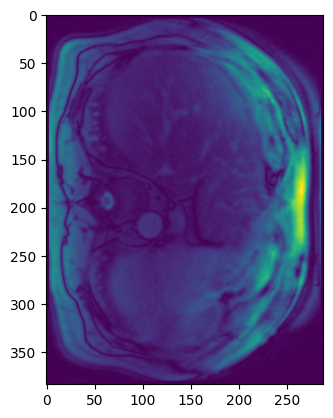

In [277]:
import matplotlib.pyplot as plt
plt.imshow(liver_proj[ :, :, 0])